# Author: Omkar Kanade

# Task2: Prediction using unsupervised ML

### Predict optimum no. of. clusters in Iris Dataset and represent it visually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step1: Loading the Dataset

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
np.array(df)

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df1=df.iloc[:,1:]
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step2: Separation of dependent and independent matrix

In [6]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
y[0]

'Iris-setosa'

## Step3: Handling Categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder
y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Step4: Applying Kmeans Clustering Algo

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,n_init=150)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=150)

In [10]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Step 5: Visualization of iris flower dataset with optimum 3 clusters

,Color,Iris_Species
0,Blue,setosa
1,Purple,versicolor
2,Yellow,virginica


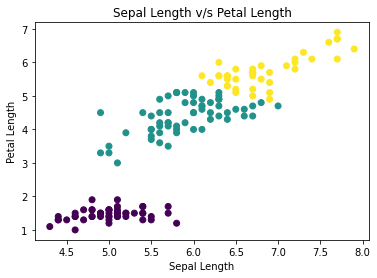

In [11]:
plt.scatter(x[:,0],x[:,2],c=y_kmeans)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length v/s Petal Length')

pd.DataFrame({'Color':['Blue','Purple','Yellow'], 'Iris_Species':['setosa','versicolor', 'virginica']})

,Colors,Iris_Species
0,Blue,setosa
1,Purple,versicolor
2,Yellow,virginica


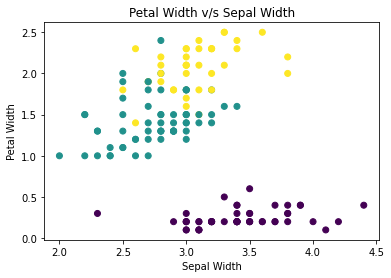

In [13]:
plt.scatter(x[:,1],x[:,3],c=y_kmeans)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Petal Width v/s Sepal Width')

pd.DataFrame({'Colors':['Blue','Purple','Yellow'],'Iris_Species':['setosa','versicolor','virginica']})

## Difference in predicted and actual clustering values

Text(0.5, 1.0, 'Actual')

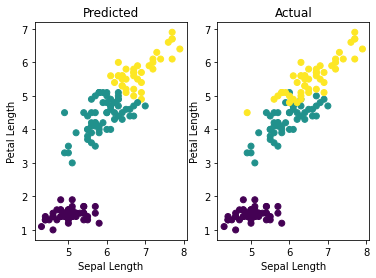

In [14]:
fig, axes=plt.subplots(1,2)

axes[0].scatter(x[:,0],x[:,2],c=y_kmeans)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Petal Length')
axes[0].set_title('Predicted')

axes[1].scatter(x[:,0],x[:,2],c=y)
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Petal Length')
axes[1].set_title('Actual')

In [15]:
pd.DataFrame({'Predictions':y_kmeans,'Actual':y})

,Predictions,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,1,2
147,2,2
148,2,2


## Direct cluster analysis using Seaborn

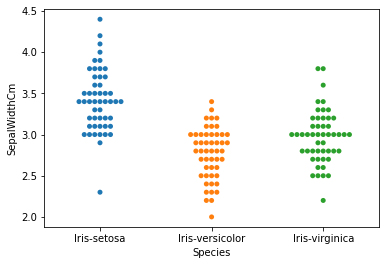

In [16]:
sns.swarmplot(x='Species',y='SepalWidthCm',data=df1)

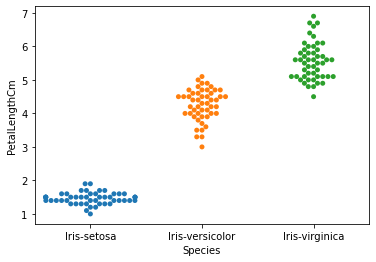

In [17]:
sns.swarmplot(x='Species',y='PetalLengthCm',data=df1)